# Exploratory Data Analysis (EDA) for Trip Purpose Prediction

In this notebook, we will perform exploratory data analysis on the datasets to understand the distributions and relationships between household and individual characteristics and trip purposes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn  # Set visualisation style
import sys
import os

# Add the 'src' folder to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

# Import helper functions
from utils.helpers import load_data, save_data, encode_categorical, split_data

# Import specific functions from other src files
from feature_engineering import extract_features, prepare_data
from model_evaluation import evaluate_model, print_evaluation_results

# Set visualisation style
sn.set_theme(style='whitegrid')

In [5]:
# Load the datasets
household = load_data("../dataset/raw/hhv2pub.csv")
longDistanceTravel = load_data("../dataset/raw/ldtv2pub.csv")
person = load_data("../dataset/raw/perv2pub.csv")
trip = load_data("../dataset/raw/tripv2pub.csv")
vehicle = load_data("../dataset/raw/vehv2pub.csv")

# Display the first few rows of each dataset
print('Household Data:')
display(household)
print('Long Distance Travel Data:')
display(longDistanceTravel.head())
print('Person Data:')
display(person.head())
print('Trip Data:')
display(trip.head())
print('Vehicle Data:')
display(vehicle.head())

Household Data:


,HOUSEID,WTHHFIN,WTHHFIN5D,WTHHFIN2D,NUMADLT,HOMEOWN,HOMETYPE,RAIL,CENSUS_D,CENSUS_R,...,URBAN,URBANSIZE,URBRUR,PPT517,YOUNGCHILD,RESP_CNT,URBRUR_2010,TDAYDATE,WRKCOUNT,STRATUMID
0,9000013002,4621.758002,0.000000,13946.191168,2,1,1,1,1,1,...,1,4,1,2,0,4,1,202202,1,1021
1,9000013016,2982.998407,3878.814279,0.000000,2,3,3,2,1,1,...,1,2,1,0,0,2,1,202202,2,1021
2,9000013026,9979.573402,14700.796695,0.000000,1,3,3,1,1,1,...,1,4,1,0,0,1,1,202202,1,1021
3,9000013039,10355.890735,13150.678996,0.000000,2,3,3,1,1,1,...,1,4,1,2,0,4,1,202201,1,1021
4,9000013041,4926.862529,7061.357485,0.000000,1,1,2,2,1,1,...,1,3,1,0,0,1,1,202201,1,1021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7888,9000218013,8792.888034,11731.186218,0.000000,2,1,1,2,6,3,...,1,1,1,0,0,2,1,202301,0,1031
7889,9000218021,2508.248447,0.000000,16373.594134,1,2,1,2,6,3,...,4,6,2,0,0,1,2,202212,0,1032
7890,9000218034,12559.631900,17007.945486,0.000000,2,2,1,2,6,3,...,4,6,2,0,0,2,2,202212,0,1032
7891,9000218036,76132.849334,94596.352132,0.000000,1,3,1,2,6,3,...,4,6,2,0,0,1,2,202301,0,1032


Long Distance Travel Data:


,HOUSEID,PERSONID,LONGDIST,MAINMODE,INT_FLAG,LD_NUMONTRP,ONTP_P1,ONTP_P2,ONTP_P3,ONTP_P4,...,WTPERFIN2D,R_AGE,R_SEX,WORKER,DRIVER,R_RACE,R_HISP,PROXY,EDUC,R_SEX_IMP
0,9000013002,1,1,1,1,2,1,1,2,2,...,13363.809355,39,2,2,1,1,2,1,7,2
1,9000013002,2,1,3,1,2,1,1,2,2,...,19360.094919,42,1,1,1,1,2,2,7,1
2,9000013002,3,0,3,1,5,1,1,1,1,...,7285.044994,8,-7,-1,-1,1,2,2,-1,1
3,9000013002,4,0,3,1,5,1,1,1,1,...,27109.336829,5,-7,-1,-1,1,2,2,-1,1
4,9000013016,1,0,1,1,2,1,1,-9,-9,...,0.000000,32,2,1,1,1,2,1,6,2


Person Data:


,HOUSEID,PERSONID,WTPERFIN,WTPERFIN5D,WTPERFIN2D,R_AGE,R_SEX,R_RELAT,WORKER,DRIVER,...,MSACAT,MSASIZE,TRAVDAY,URBAN,URBANSIZE,URBRUR,TDAYDATE,WRKCOUNT,STRATUMID,HHFAMINC_IMP
0,9000013002,1,3938.688806,0.000000,13363.809355,39,2,7,2,1,...,1,5,1,1,4,1,202202,1,1021,11
1,9000013002,2,5409.514573,0.000000,19360.094919,42,1,1,1,1,...,1,5,1,1,4,1,202202,1,1021,11
2,9000013002,3,3013.582163,0.000000,7285.044994,8,-7,2,-1,-1,...,1,5,1,1,4,1,202202,1,1021,11
3,9000013002,4,6214.108740,0.000000,27109.336829,5,-7,2,-1,-1,...,1,5,1,1,4,1,202202,1,1021,11
4,9000013016,1,3183.420810,4177.234452,0.000000,32,2,7,1,1,...,3,3,4,1,2,1,202202,2,1021,7


Trip Data:


,HOUSEID,PERSONID,TRIPID,SEQ_TRIPID,VEHCASEID,FRSTHM,PARK,HHMEMDRV,TDWKND,TRAVDAY,...,WORKER,DRIVER,R_RACE,R_HISP,PROXY,EDUC,PRMACT,R_SEX_IMP,VEHTYPE,HHFAMINC_IMP
0,9000013002,1,1,1,900001300201,1,2,1,1,1,...,2,1,1,2,1,7,3,2,3,11
1,9000013002,1,2,2,900001300201,1,2,1,1,1,...,2,1,1,2,1,7,3,2,3,11
2,9000013002,2,1,1,900001300202,1,-1,1,1,1,...,1,1,1,2,2,7,-1,1,3,11
3,9000013002,2,2,2,900001300202,1,-1,1,1,1,...,1,1,1,2,2,7,-1,1,3,11
4,9000013002,2,3,3,900001300202,1,-1,1,1,1,...,1,1,1,2,2,7,-1,1,3,11


Vehicle Data:


,HOUSEID,VEHID,VEHYEAR,MAKE,HHVEHCNT,VEHTYPE,VEHFUEL,VEHCOMMERCIAL,VEHCOM_RS,VEHCOM_DEL,...,URBAN,URBANSIZE,URBRUR,TDAYDATE,WRKCOUNT,STRATUMID,WTHHFIN,WTHHFIN5D,WTHHFIN2D,HHFAMINC_IMP
0,9000013002,1,2015,48,2,3,1,2,-1,-1,...,1,4,1,202202,1,1021,4621.758002,0.000000,13946.191168,11
1,9000013002,2,2019,48,2,3,1,2,-1,-1,...,1,4,1,202202,1,1021,4621.758002,0.000000,13946.191168,11
2,9000013016,1,2011,49,1,1,1,2,-1,-1,...,1,2,1,202202,2,1021,2982.998407,3878.814279,0.000000,7
3,9000013039,1,2015,35,1,1,1,2,-1,-1,...,1,4,1,202201,1,1021,10355.890735,13150.678996,0.000000,7
4,9000013041,1,2014,34,1,1,1,2,-1,-1,...,1,3,1,202201,1,1021,4926.862529,7061.357485,0.000000,11


In [9]:
# Check for missing values in the datasets
missing_household = household.isnull().sum()
missing_person = person.isnull().sum()
missing_trip = trip.isnull().sum()
missing_vehicle = vehicle.isnull().sum()
missing_longDistanceTravel = longDistanceTravel.isnull().sum()

# Display the missing values
print('Missing Values in Household Data:')
print(missing_household[missing_household > 0])
print('Missing Values in Person Data:')
print(missing_person[missing_person > 0])
print('Missing Values in Trip Data:')
print(missing_trip[missing_trip > 0])
print('Missing Values in Vehicle Data:')
print(missing_vehicle[missing_vehicle > 0])
print('Missing Values in Long Distance Travel Data:')
print(missing_longDistanceTravel[missing_longDistanceTravel > 0])

# Check for duplicates in the datasets
duplicates_household = household.duplicated().sum()
duplicates_person = person.duplicated().sum()
duplicates_trip = trip.duplicated().sum()
duplicates_vehicle = vehicle.duplicated().sum()
duplicates_longDistanceTravel = longDistanceTravel.duplicated().sum()

# Display the number of duplicates
print('Duplicates in Household Data:', duplicates_household)
print('Duplicates in Person Data:', duplicates_person)
print('Duplicates in Trip Data:', duplicates_trip)
print('Duplicates in Vehicle Data:', duplicates_vehicle)
print('Duplicates in Long Distance Travel Data:', duplicates_longDistanceTravel)


Missing Values in Household Data:
Series([], dtype: int64)
Missing Values in Person Data:
Series([], dtype: int64)
Missing Values in Trip Data:
Series([], dtype: int64)
Missing Values in Vehicle Data:
Series([], dtype: int64)
Missing Values in Long Distance Travel Data:
Series([], dtype: int64)
Duplicates in Household Data: 0
Duplicates in Person Data: 0
Duplicates in Trip Data: 0
Duplicates in Vehicle Data: 0
Duplicates in Long Distance Travel Data: 0


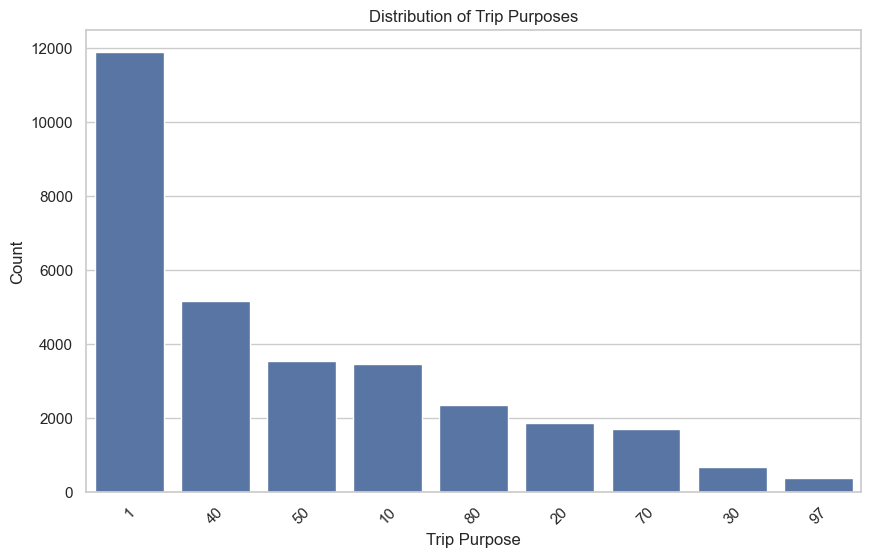

In [11]:
# Visualize the distribution of trip purposes
plt.figure(figsize=(10, 6))
sn.countplot(data=trip, x='WHYTRP1S', order=trip['WHYTRP1S'].value_counts().index)
plt.title('Distribution of Trip Purposes')
plt.xlabel('Trip Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

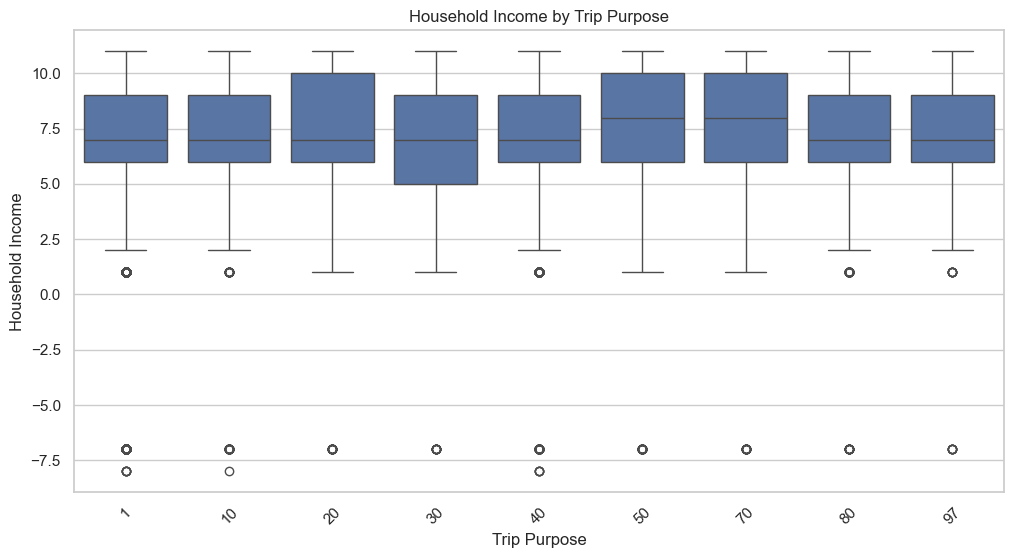

In [14]:
# Analyze the relationship between household income and trip purpose
plt.figure(figsize=(12, 6))
sn.boxplot(trip, x='WHYTRP1S', y='HHFAMINC')
plt.title('Household Income by Trip Purpose')
plt.xlabel('Trip Purpose')
plt.ylabel('Household Income')
plt.xticks(rotation=45)
plt.show()

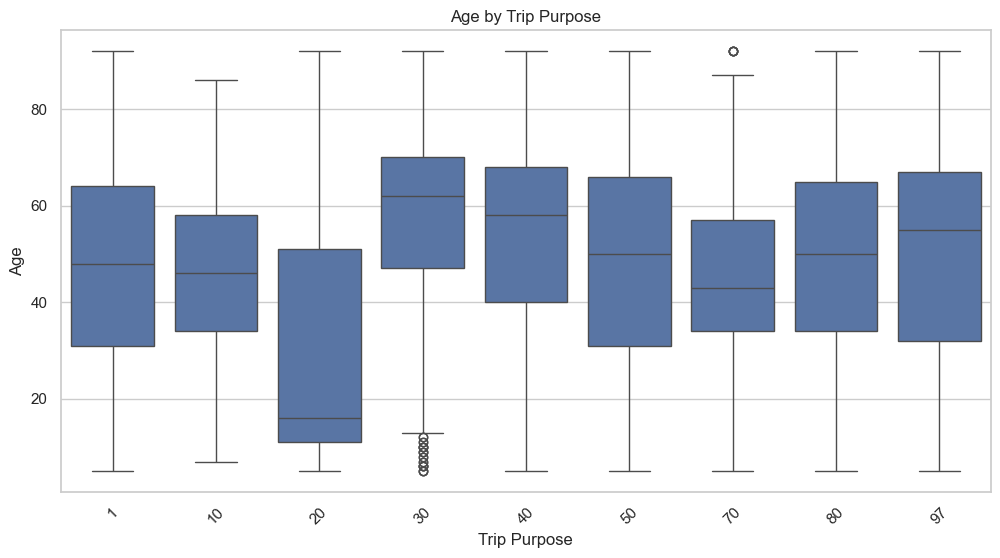

In [17]:
# Analyze the relationship between age and trip purpose
plt.figure(figsize=(12, 6))

# Merge on both HOUSEID and PERSONID to avoid Cartesian product
merged = trip.merge(person[['HOUSEID', 'PERSONID', 'R_AGE']], on=['HOUSEID', 'PERSONID'], suffixes=('', '_person'))
sn.boxplot(data=merged, x='WHYTRP1S', y='R_AGE')

plt.title('Age by Trip Purpose')
plt.xlabel('Trip Purpose')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

### Conclusion
In this exploratory analysis, we have visualized the distributions of trip purposes and analyzed how household income and age relate to trip purposes. Further analysis can be conducted to refine our understanding and prepare for predictive modeling.